In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data
data=pd.read_csv('titanic.csv')

In [4]:
#shape of the data
data.shape

(891, 25)

In [48]:
#first three rows of the data
data.head(3)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
#checking missing values in the data
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
#separating independent and dependent variables
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [8]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [9]:
#creating the train and validation set
#Using stratify = y, we make the distribution of y (Survived) similar in train and test data sets
#random_state = 101 ensures we get same results every time we run the program
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [10]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [11]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [12]:
#shape of training set
X_train.shape, y_train.shape

((668, 24), (668,))

In [13]:
#shape of validation set
X_valid.shape, y_valid.shape

((223, 24), (223,))

In [14]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [16]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [17]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [18]:
#checking the training score
dt_model.score(X_train, y_train)

0.9880239520958084

In [19]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.7533632286995515

In [ ]:
#Score of training data set is 98.8 while that of test data set is 75.

#Try changing DecisionTreeClassifier parameters like max_depth / max_leaf_nodes / min_samples_split /min_samples_leaf.. 

In [20]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

## Changing the max_depth

In [26]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [27]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300


No handles with labels found to put in legend.


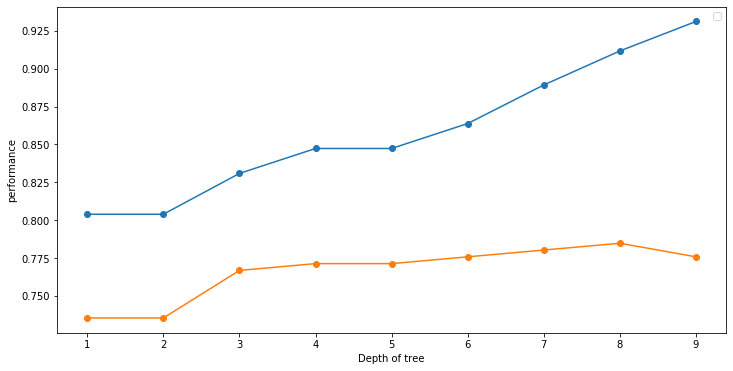

In [28]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
#When the max_depth is 8, accuracy of both train and test data set is highest

In [29]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [30]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [31]:
#Training score
dt_model.score(X_train, y_train)

0.8802395209580839

In [32]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8116591928251121

[Text(472.15384615384613, 951.3000000000001, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]'),
 Text(171.69230769230768, 679.5, 'Pclass_3 <= 0.5\ngini = 0.372\nsamples = 247\nvalue = [61, 186]'),
 Text(85.84615384615384, 407.70000000000005, 'gini = 0.098\nsamples = 136\nvalue = [7, 129]'),
 Text(257.53846153846155, 407.70000000000005, 'Fare <= 23.35\ngini = 0.5\nsamples = 111\nvalue = [54, 57]'),
 Text(171.69230769230768, 135.89999999999998, '\n  (...)  \n'),
 Text(343.38461538461536, 135.89999999999998, '\n  (...)  \n'),
 Text(772.6153846153845, 679.5, 'Fare <= 15.173\ngini = 0.277\nsamples = 421\nvalue = [351, 70]'),
 Text(600.9230769230769, 407.70000000000005, 'Age <= 10.5\ngini = 0.174\nsamples = 250\nvalue = [226, 24]'),
 Text(515.0769230769231, 135.89999999999998, '\n  (...)  \n'),
 Text(686.7692307692307, 135.89999999999998, '\n  (...)  \n'),
 Text(944.3076923076923, 407.70000000000005, 'Pclass_1 <= 0.5\ngini = 0.393\nsamples = 171\nvalue = [125, 46]'),
 Text(

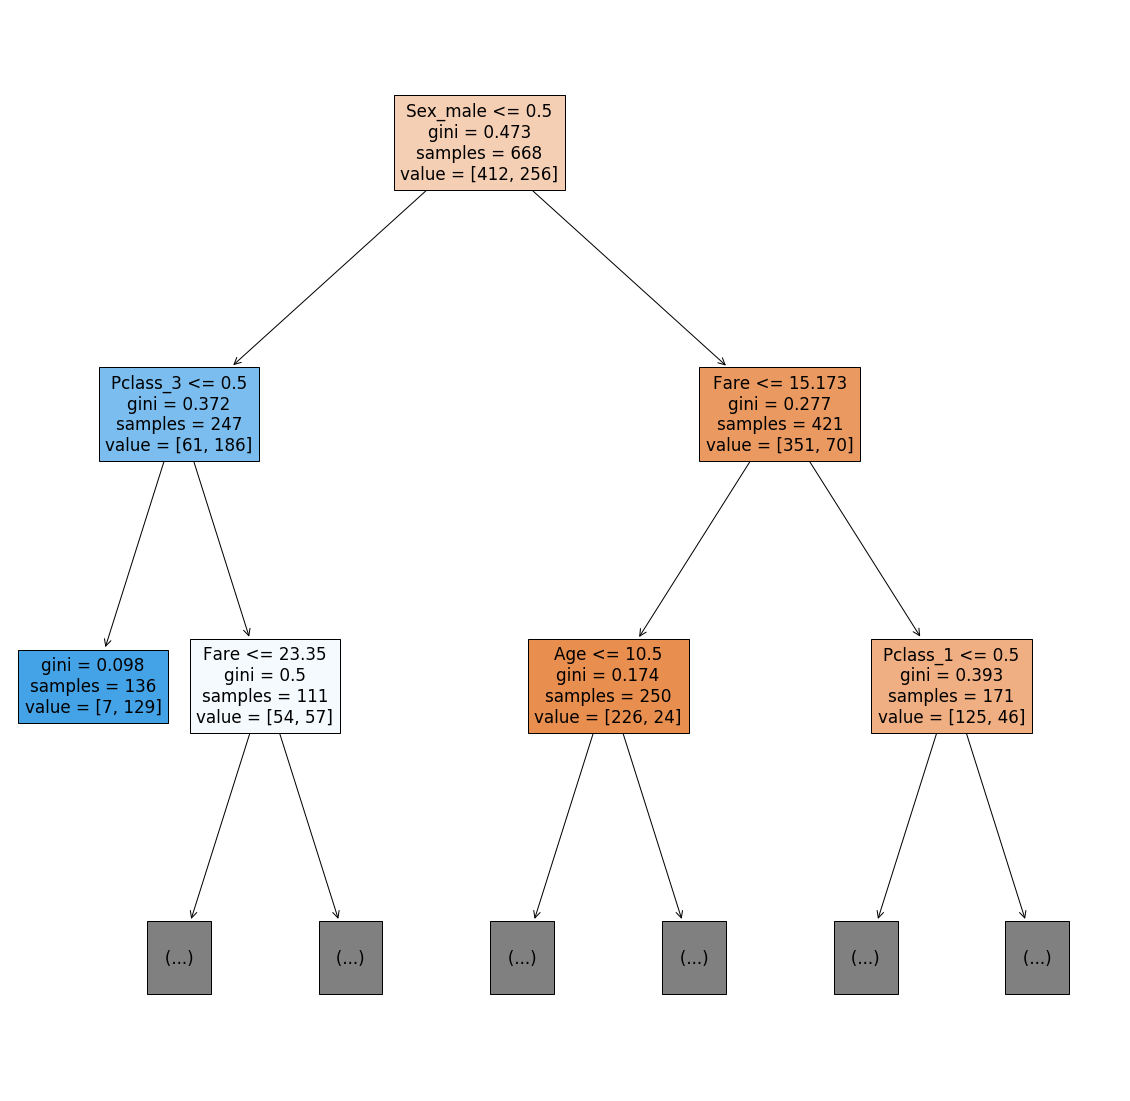

In [45]:
from sklearn.tree import plot_tree

dt_model.fit(X_train,y_train)
plt.figure(figsize=(20,20))
plot_tree(dt_model,feature_names=X_train.columns, max_depth=2, filled=True)

[Text(457.98113207547175, 1026.8, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]'),
 Text(273.7358490566038, 906.0, 'Pclass_3 <= 0.5\ngini = 0.372\nsamples = 247\nvalue = [61, 186]'),
 Text(231.62264150943398, 785.2, 'gini = 0.098\nsamples = 136\nvalue = [7, 129]'),
 Text(315.8490566037736, 785.2, 'Fare <= 23.35\ngini = 0.5\nsamples = 111\nvalue = [54, 57]'),
 Text(231.62264150943398, 664.4, 'Age <= 36.5\ngini = 0.48\nsamples = 90\nvalue = [36, 54]'),
 Text(189.50943396226415, 543.6, 'Age <= 6.5\ngini = 0.463\nsamples = 85\nvalue = [31, 54]'),
 Text(84.22641509433963, 422.79999999999995, 'Fare <= 11.375\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(42.113207547169814, 302.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(126.33962264150944, 302.0, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(294.7924528301887, 422.79999999999995, 'Fare <= 8.083\ngini = 0.478\nsamples = 76\nvalue = [30, 46]'),
 Text(210.56603773584908, 302.0, 'Age <= 30.1\ngini = 0.411\n

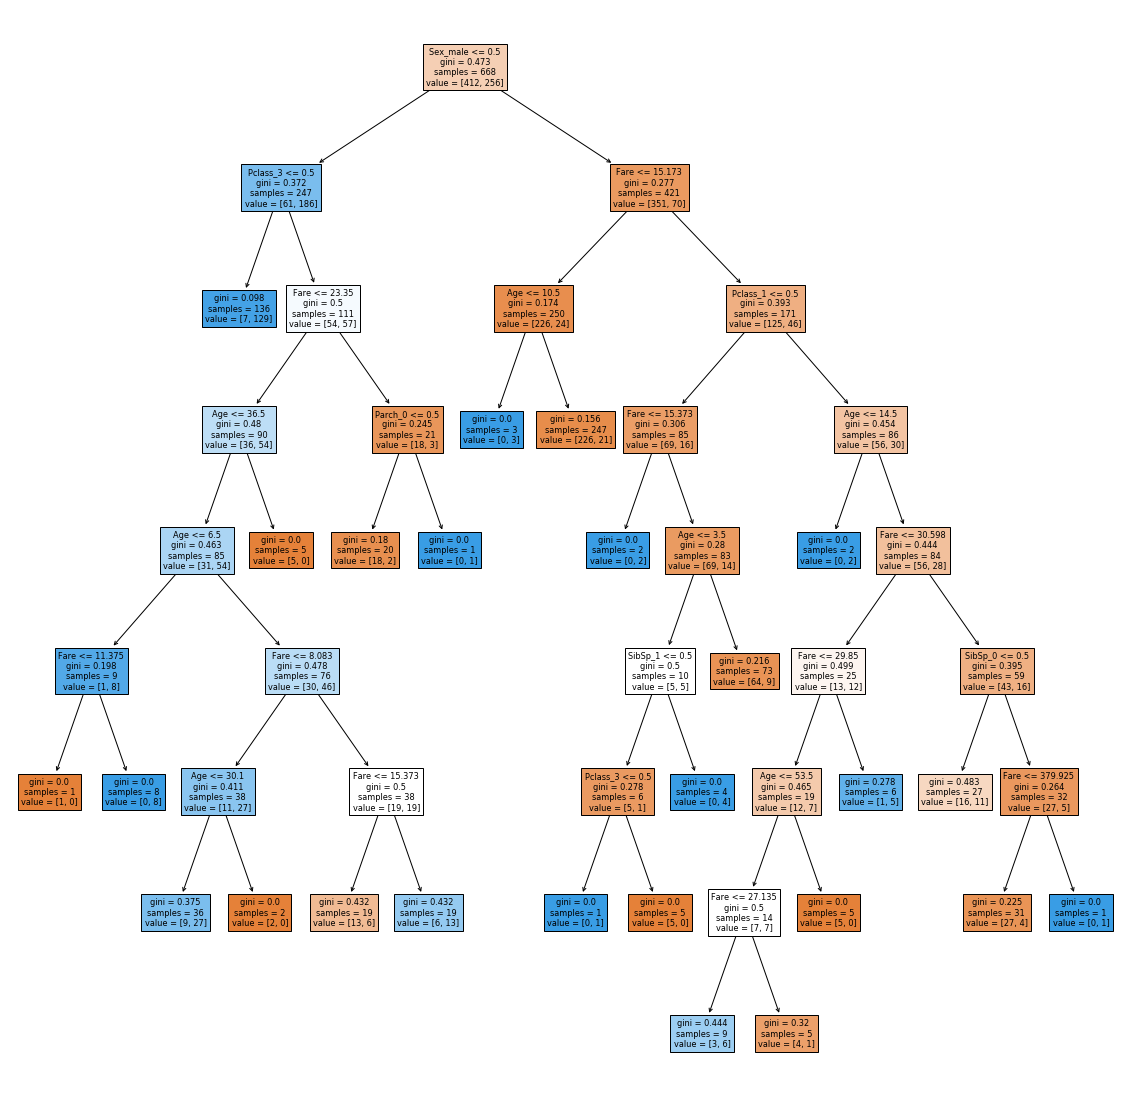

In [47]:
from sklearn.tree import plot_tree

dt_model.fit(X_train,y_train)
plt.figure(figsize=(20,20))
plot_tree(dt_model,feature_names=X_train.columns, filled=True)